In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn import svm
from urllib.request import urlopen
from bs4 import BeautifulSoup
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# read csv
leagues = pd.read_csv("Leagues.csv")
nations = pd.read_csv("Nations.csv")
nations.head()

,Nation,Group,ID,FIFA_Rank
0,Germany,A,25,16
1,Scotland,A,1108,39
2,Hungary,A,769,26
3,Switzerland,A,15,19
4,Spain,B,9,8


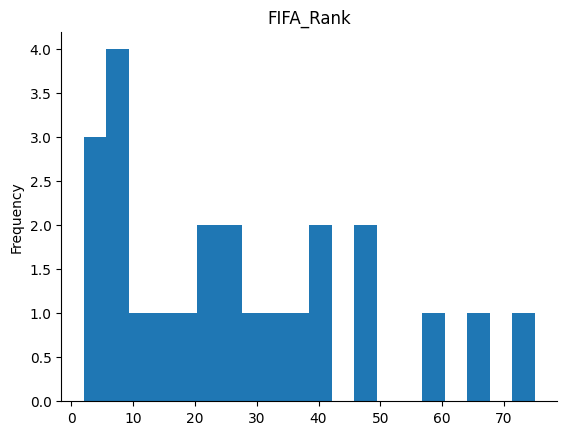

In [3]:
# @title FIFA_Rank

from matplotlib import pyplot as plt
nations['FIFA_Rank'].plot(kind='hist', bins=20, title='FIFA_Rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

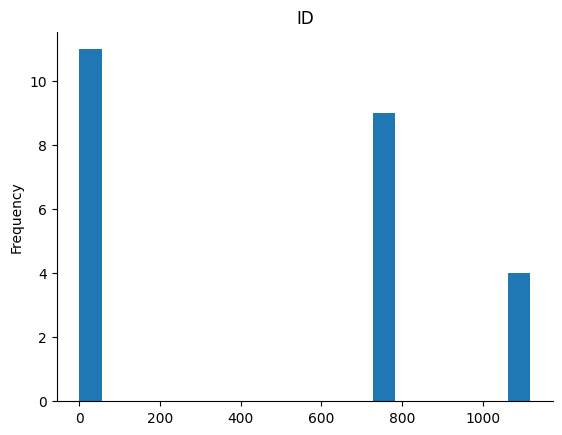

In [4]:
# @title ID

from matplotlib import pyplot as plt
nations['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
team_data = pd.read_csv("Team_scrape.csv")

In [6]:
team_data.head()

,Unnamed: 0,id,name,logo,output$form,output$league$season,played.home,played.away,played.total,wins.home,...,draws.total,loses.home,loses.away,loses.total,home,away,total,home.1,away.1,total.1
0,1,25,Germany,https://media.api-sports.io/football/teams/25.png,WLWWWLW,2010,4,3,7,2,...,0,2,0,2,8,8,16,3,2,5
1,2,15,Switzerland,https://media.api-sports.io/football/teams/15.png,WLD,2010,1,2,3,0,...,1,0,1,1,0,1,1,0,1,1
2,3,9,Spain,https://media.api-sports.io/football/teams/9.png,LWWWWWW,2010,3,4,7,2,...,0,1,0,1,3,5,8,1,1,2
3,4,768,Italy,https://media.api-sports.io/football/teams/768...,DDL,2010,2,1,3,0,...,2,0,1,1,2,2,4,2,3,5
4,5,1091,Slovenia,https://media.api-sports.io/football/teams/109...,WDL,2010,2,1,3,0,...,1,1,0,1,2,1,3,3,0,3


In [7]:
player_data = pd.read_csv('player_stats_data.csv')
player_id = pd.read_csv('player_id_data.csv')

In [8]:
player_data.shape

(15153, 25)

In [9]:
player_id.shape

(55417, 4)

In [10]:
team_data.head()

,Unnamed: 0,id,name,logo,output$form,output$league$season,played.home,played.away,played.total,wins.home,...,draws.total,loses.home,loses.away,loses.total,home,away,total,home.1,away.1,total.1
0,1,25,Germany,https://media.api-sports.io/football/teams/25.png,WLWWWLW,2010,4,3,7,2,...,0,2,0,2,8,8,16,3,2,5
1,2,15,Switzerland,https://media.api-sports.io/football/teams/15.png,WLD,2010,1,2,3,0,...,1,0,1,1,0,1,1,0,1,1
2,3,9,Spain,https://media.api-sports.io/football/teams/9.png,LWWWWWW,2010,3,4,7,2,...,0,1,0,1,3,5,8,1,1,2
3,4,768,Italy,https://media.api-sports.io/football/teams/768...,DDL,2010,2,1,3,0,...,2,0,1,1,2,2,4,2,3,5
4,5,1091,Slovenia,https://media.api-sports.io/football/teams/109...,WDL,2010,2,1,3,0,...,1,1,0,1,2,1,3,3,0,3


In [11]:
## Data preparation
# Ensure unique combinations of Player_ID and Season
player_id_scrape = player_id.drop_duplicates(subset=['Player_ID', 'Season'])

In [12]:
player_data.head()

,Unnamed: 0,id,name,birthdate,height,weight,season,rating,minutes,total_shots,...,tackles,total_duels,won_duels,total_dribbles,won_dribbles,fouls_drawn,fouls_comitted,yellow,red,yellowred
0,1,27736,Ricardo Gabriel Canales Lanza,1982-05-30,181 cm,78 kg,2010,NaN,312,0,...,0,0,0,0,0,0,0,0,0,0
1,2,35806,Francisco Javier Rodríguez Pinedo,1981-10-20,191 cm,80 kg,2010,NaN,3136,0,...,0,0,0,0,0,0,0,9,1,1
2,3,100768,Dominic Adiyiah,1989-11-29,172 cm,70 kg,2010,NaN,1079,0,...,0,0,0,0,0,0,0,3,0,0
3,4,104275,Nam-Chol Pak,1988-10-03,183 cm,78 kg,2010,NaN,472,0,...,0,0,0,0,0,0,0,0,0,0
4,5,104297,Jun-Il Ri,1987-08-24,178 cm,66 kg,2010,NaN,2483,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
player_id_scrape.dtypes

Unnamed: 0      int64
Player_ID       int64
Team_ID       float64
Season          int64
dtype: object

In [14]:
# Ensure the columns to be merged are of the same type
player_data['id'] = player_data['id'].astype(str)
player_data['season'] = player_data['season'].astype(str)
player_id_scrape['Player_ID'] = player_id_scrape['Player_ID'].astype(str)
player_id_scrape['Season'] = player_id_scrape['Season'].astype(str)

C:\Users\tomte\AppData\Local\Temp\ipykernel_16792\2339012686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_id_scrape['Player_ID'] = player_id_scrape['Player_ID'].astype(str)
C:\Users\tomte\AppData\Local\Temp\ipykernel_16792\2339012686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_id_scrape['Season'] = player_id_scrape['Season'].astype(str)


In [15]:
# Merge player data with player IDs
player_data_team = pd.merge(player_data, player_id_scrape, left_on=['id', 'season'], right_on=['Player_ID', 'Season'])


In [16]:
player_data_team.to_csv("player_data_team_new.csv")

In [17]:
# remove unnecessary columns
player_data_team = player_data_team.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [18]:
player_data_team.head()

,id,name,birthdate,height,weight,season,rating,minutes,total_shots,target_shots,...,total_dribbles,won_dribbles,fouls_drawn,fouls_comitted,yellow,red,yellowred,Player_ID,Team_ID,Season
0,27736,Ricardo Gabriel Canales Lanza,1982-05-30,181 cm,78 kg,2010,NaN,312,0,0,...,0,0,0,0,0,0,0,27736,4672.0,2010
1,35806,Francisco Javier Rodríguez Pinedo,1981-10-20,191 cm,80 kg,2010,NaN,3136,0,0,...,0,0,0,0,9,1,1,35806,16.0,2010
2,100768,Dominic Adiyiah,1989-11-29,172 cm,70 kg,2010,NaN,1079,0,0,...,0,0,0,0,3,0,0,100768,1504.0,2010
3,104275,Nam-Chol Pak,1988-10-03,183 cm,78 kg,2010,NaN,472,0,0,...,0,0,0,0,0,0,0,104275,1561.0,2010
4,104297,Jun-Il Ri,1987-08-24,178 cm,66 kg,2010,NaN,2483,0,0,...,0,0,0,0,0,0,0,104297,1561.0,2010


In [19]:
# Convert columns to date where possible
player_data_team['season'] = pd.to_datetime(player_data_team['season'], errors='coerce')
player_data_team['birthdate'] = pd.to_datetime(player_data_team['birthdate'], format='%Y-%m-%d', errors='coerce')

In [20]:
player_data_team.to_csv("player_data_team_new2.csv")

In [21]:
# Calculate age
#player_data_team['age'] = player_data_team.apply(lambda row: (pd.Timestamp(row['season'], 1, 1) - row['birthdate']).days / 365.25, axis=1)
player_data_team['age'] = (player_data_team['season'] - player_data_team['birthdate']).dt.days / 365.25


In [22]:
#remove day and month from season
player_data_team['season'] = player_data_team['season'].dt.year


In [23]:
#engineer additional features
# Remove non-numeric characters and convert to numeric
player_data_team['height'] = pd.to_numeric(player_data_team['height'].str.replace("[^0-9.]", "", regex=True))
player_data_team['weight'] = pd.to_numeric(player_data_team['weight'].str.replace("[^0-9.]", "", regex=True))

# Engineer additional features
player_data_team['duel_efficiency'] = (player_data_team['won_duels'] / player_data_team['total_duels']) * 100
player_data_team['dribble_efficicency'] = (player_data_team['won_dribbles'] / player_data_team['total_dribbles']) * 100


In [24]:
player_data_team.to_csv("player_data_team_new3.csv")

In [25]:

# Aggregate data
player_data_team_agg = player_data_team.groupby(['Team_ID', 'season']).agg(
    Height=('height', 'mean'),
    Weight=('weight', 'mean'),
    Rating=('rating', 'mean'),
    Minutes_Played=('minutes', 'mean'),
    Total_Shots=('total_shots', 'mean'),
    Player_Goals=('player_goals', 'mean'),
    Total_Passes=('total_passes', 'mean'),
    Key_Passes=('key_passes', 'mean'),
    Accuracy_Passes=('accuracy_passes', 'mean'),
    Tackles=('tackles', 'mean'),
    Dribble_Efficiency=('dribble_efficicency', 'mean'),
    Duel_Efficiency=('duel_efficiency', 'mean'),
    Fouls_Drawn=('fouls_drawn', 'mean'),
    Fouls_Committed=('fouls_comitted', 'mean'),
    Yellows=('yellow', 'mean'),
    Reds=('red', 'mean'),
    Yellowreds=('yellowred', 'mean'),
    Age=('age', 'mean')
).reset_index()


In [26]:
# Rename columns
player_data_team_agg.columns = ['Team_ID', 'Season', 'Height', 'Weight', 'Rating', 'Minutes_Played',
                                'Total_Shots', 'Player_Goals', 'Total_Passes', 'Key_Passes', 'Accuracy_Passes',
                                'Tackles', 'Dribble_Efficiency', 'Duel_Efficiency', 'Fouls_Drawn', 'Fouls_Committed', 'Yellows',
                                'Reds', 'Yellowreds', 'Age']

In [27]:
# Merge and drop unnecessary columns
hist = pd.merge(team_data, nations, left_on="name", right_on="Nation", how="outer")

# Print columns to check before dropping
#print(hist.columns)
hist.to_csv("hist_data.csv")
#player_data_team_agg.head()

hist = hist.drop(columns=['Unnamed: 0', 'played.home', 'played.total', 'wins.home',
                          'wins.away', 'played.away', 'logo', 'output$form', 'ID',
                           'draws.total', 'loses.total', 'home', 'away', 'home.1', 'away.1', 'Nation'])

#print(hist.columns)
#hist.head()
hist.columns = ['ID', 'Nation','Season', "Wins_Total", "Draws_Home", "Draws_Away", "Loses_Home",
                  "Loses_Away", "Goals_Scored", "Goals_Conceded",
                  "Group", "FIFA_Rank"]
hist = pd.merge(hist, player_data_team_agg, left_on=['ID', 'Season'], right_on=['Team_ID', 'Season'])
hist = hist.drop(columns=['Team_ID'])



In [28]:
hist.head()

,ID,Nation,Season,Wins_Total,Draws_Home,Draws_Away,Loses_Home,Loses_Away,Goals_Scored,Goals_Conceded,...,Accuracy_Passes,Tackles,Dribble_Efficiency,Duel_Efficiency,Fouls_Drawn,Fouls_Committed,Yellows,Reds,Yellowreds,Age
0,25,Germany,2010,5,0,0,2,0,16,5,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,4.333333,0.066667,0.166667,25.691901
1,25,Germany,2014,6,1,0,0,0,18,4,...,8.090909,0.000000,71.428571,72.023810,0.090909,0.000000,4.318182,0.090909,0.000000,25.739655
2,25,Germany,2018,1,0,0,1,1,2,4,...,308.413223,26.917355,64.831003,55.303618,29.578512,26.099174,3.818182,0.107438,0.074380,25.893213
3,25,Germany,2018,0,2,0,0,2,3,7,...,308.413223,26.917355,64.831003,55.303618,29.578512,26.099174,3.818182,0.107438,0.074380,25.893213
4,25,Germany,2018,10,0,0,0,0,43,4,...,308.413223,26.917355,64.831003,55.303618,29.578512,26.099174,3.818182,0.107438,0.074380,25.893213


In [29]:
# print(len(hist.columns))
# print(len(hist))
print(hist.shape)
hist

(409, 30)


,ID,Nation,Season,Wins_Total,Draws_Home,Draws_Away,Loses_Home,Loses_Away,Goals_Scored,Goals_Conceded,...,Accuracy_Passes,Tackles,Dribble_Efficiency,Duel_Efficiency,Fouls_Drawn,Fouls_Committed,Yellows,Reds,Yellowreds,Age
0,25,Germany,2010,5,0,0,2,0,16,5,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,4.333333,0.066667,0.166667,25.691901
1,25,Germany,2014,6,1,0,0,0,18,4,...,8.090909,0.000000,71.428571,72.023810,0.090909,0.000000,4.318182,0.090909,0.000000,25.739655
2,25,Germany,2018,1,0,0,1,1,2,4,...,308.413223,26.917355,64.831003,55.303618,29.578512,26.099174,3.818182,0.107438,0.074380,25.893213
3,25,Germany,2018,0,2,0,0,2,3,7,...,308.413223,26.917355,64.831003,55.303618,29.578512,26.099174,3.818182,0.107438,0.074380,25.893213
4,25,Germany,2018,10,0,0,0,0,43,4,...,308.413223,26.917355,64.831003,55.303618,29.578512,26.099174,3.818182,0.107438,0.074380,25.893213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1104,Georgia,2017,3,1,1,0,1,13,5,...,32.918919,1.675676,67.648636,57.425661,4.945946,6.621622,3.054054,0.000000,0.081081,25.295003
405,1104,Georgia,2019,0,0,1,0,1,3,4,...,54.206897,11.344828,68.750724,50.585258,11.758621,8.310345,3.724138,0.034483,0.103448,25.433879
406,1104,Georgia,2021,2,0,0,0,2,4,8,...,15.163265,7.122449,58.130146,53.059114,7.040816,6.224490,4.408163,0.061224,0.122449,25.471176
407,1104,Georgia,2023,3,3,0,1,3,14,18,...,49.757143,17.342857,53.451001,50.009916,14.428571,13.171429,4.585714,0.185714,0.085714,25.617092


In [30]:
hist.to_csv("final_dataset.csv")

Now, model prediction using random forest


In [31]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# import matplotlib.pyplot as plt

# # Create model_df by dropping unnecessary columns
# model_df = hist.drop(columns=['Group', 'ID', 'Nation', 'FIFA_Rank', 'Season'])

# # Replace NaNs with 0
# model_df.fillna(0, inplace=True)

# # Set seed for reproducibility
# np.random.seed(2024)

# # Create an index for split
# X = model_df.drop(columns=['Wins_Total'])
# y = model_df['Wins_Total']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# # Fit a random forest model with 180 trees
# model = RandomForestRegressor(n_estimators=180, max_features=20, random_state=2024)
# model.fit(X_train, y_train)

# # Print the model details
# print(f"Number of trees: {model.n_estimators}")
# print(f"Number of variables tried at each split: {model.max_features}")

# # Calculate and print the mean of squared residuals
# y_pred = model.predict(X_test)
# mse = np.mean((y_pred - y_test) ** 2)
# print(f"Mean of squared residuals: {mse}")

# # Calculate and print the percentage of variance explained
# variance_explained = model.score(X_test, y_test) * 100
# print(f"% Variance explained: {variance_explained}")

# # Plot model performance
# plt.figure(figsize=(10, 5))
# plt.plot(y_test.values, label='Actual Wins')
# plt.plot(y_pred, label='Predicted Wins')
# plt.xlabel('Sample Index')
# plt.ylabel('Wins Total')
# plt.title('Random Forest Model Performance')
# plt.legend()
# plt.show()


Number of trees: 180
Number of variables tried at each split: 20
Final mean of squared residuals: 0.8157121348991266
% Variance explained: 83.38579227861229


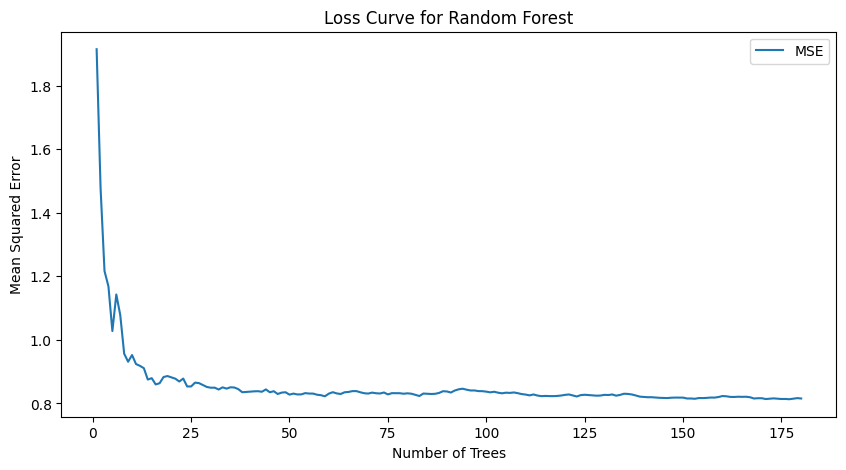

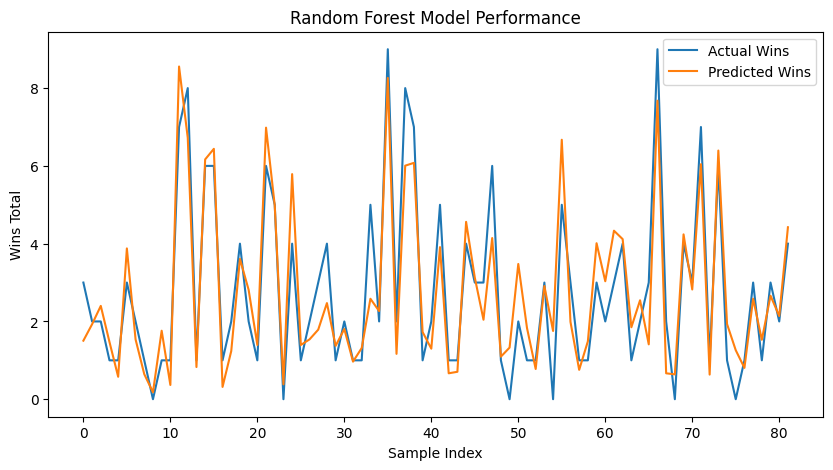

In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create model_df by dropping unnecessary columns
model_df = hist.drop(columns=['Group', 'ID', 'Nation', 'FIFA_Rank', 'Season'])

# Replace NaNs with 0
model_df.fillna(0, inplace=True)

# Set seed for reproducibility
np.random.seed(2024)

# Create an index for split
X = model_df.drop(columns=['Wins_Total'])
y = model_df['Wins_Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Initialize the model with 180 trees
n_estimators = 180
model = RandomForestRegressor(n_estimators=n_estimators, max_features=20, warm_start=True, random_state=2024)

# List to store the mean squared errors
mse_list = []

# Fit the model incrementally and calculate MSE after each tree is added
for i in range(1, n_estimators + 1):
    model.n_estimators = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.mean((y_pred - y_test) ** 2)
    mse_list.append(mse)

# Print the model details
print(f"Number of trees: {model.n_estimators}")
print(f"Number of variables tried at each split: {model.max_features}")

# Calculate and print the final mean of squared residuals
final_mse = mse_list[-1]
print(f"Final mean of squared residuals: {final_mse}")

# Calculate and print the percentage of variance explained
variance_explained = model.score(X_test, y_test) * 100
print(f"% Variance explained: {variance_explained}")

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_estimators + 1), mse_list, label='MSE')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Random Forest')
plt.legend()
plt.show()

# Plot model performance
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Wins')
plt.plot(y_pred, label='Predicted Wins')
plt.xlabel('Sample Index')
plt.ylabel('Wins Total')
plt.title('Random Forest Model Performance')
plt.legend()
plt.show()


In [33]:
X_train

,Draws_Home,Draws_Away,Loses_Home,Loses_Away,Goals_Scored,Goals_Conceded,Height,Weight,Rating,Minutes_Played,...,Accuracy_Passes,Tackles,Dribble_Efficiency,Duel_Efficiency,Fouls_Drawn,Fouls_Committed,Yellows,Reds,Yellowreds,Age
377,2,1,1,2,5,7,183.435897,75.553846,6.744985,2132.854369,...,31.825243,13.660194,54.323571,50.365153,9.485437,11.902913,4.310680,0.087379,0.106796,25.324881
303,1,3,0,0,16,5,182.760000,72.888889,6.948106,2459.777778,...,57.888889,23.777778,55.381022,55.236114,19.259259,19.259259,3.629630,0.111111,0.000000,25.500342
33,1,2,0,0,15,2,183.985401,79.948905,6.842198,3001.737226,...,151.649635,34.124088,66.498732,52.662672,24.503650,29.671533,4.635036,0.277372,0.109489,25.412671
169,0,2,2,1,5,7,183.863636,77.727273,6.984822,3346.170455,...,161.545455,46.579545,57.824999,56.437758,32.909091,30.659091,5.068182,0.079545,0.147727,26.360183
145,0,0,1,0,12,6,181.692308,77.641026,0.000000,3230.743590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.153846,0.256410,0.153846,27.979291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0,0,0,0,14,4,184.588235,80.735294,6.815980,2510.676471,...,68.147059,29.382353,60.174799,55.369692,21.176471,24.500000,4.676471,0.147059,0.058824,25.878005
27,0,0,1,2,6,9,183.352941,79.784314,6.851215,2945.911765,...,93.490196,34.833333,55.609062,54.173964,28.196078,27.215686,5.039216,0.098039,0.147059,26.478721
128,0,2,1,1,7,8,183.363014,77.123288,6.905303,3190.945205,...,266.835616,31.589041,63.431126,56.360734,27.493151,25.034247,4.616438,0.116438,0.082192,25.474989
96,0,0,1,1,9,5,186.193878,79.285714,6.898129,2589.591837,...,107.102041,34.744898,49.971697,54.444770,23.244898,23.908163,3.673469,0.142857,0.000000,26.489265


count    82.000000
mean      2.768293
std       2.229426
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       9.000000
Name: Wins_Total, dtype: float64
R2 = 0.8338579227861228
MAE = 0.7272357723577235
MSE = 0.8157121348991266


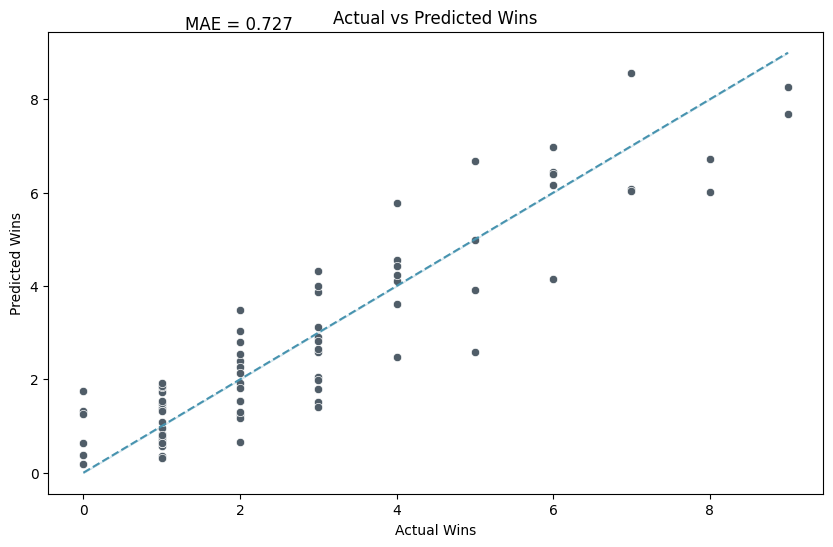

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Run predictions
predictions = model.predict(X_test)

# Calculate mean of actual values
mean_actual = np.mean(y_test)

# Calculate total variance
total_variance = np.sum((y_test - mean_actual) ** 2)

# Calculate residual variance
residual_variance = np.sum((y_test - predictions) ** 2)

# Calculate R-squared
r_squared = 1 - (residual_variance / total_variance)

# Show summary of total wins of test set
summary = y_test.describe()
print(summary)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Print R-squared
print(f'R2 = {r_squared}')



# Print MAE
print(f'MAE = {mae}')



# Print MSE
print(f'MSE = {mse}')



# Create a DataFrame for actual vs predicted values
model_test = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=model_test, color="#505D68")
sns.lineplot(x='Actual', y='Actual', data=model_test, color="#4793AF", linestyle='dashed')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted Wins')
plt.text(1.3, 9.5, f'MAE = {mae:.3f}', fontsize=12)
plt.show()

In [ ]:
#!pip install shap

C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████████████████████████████████████████████████| 82/82 [01:39<00:00,  1.21s/it]


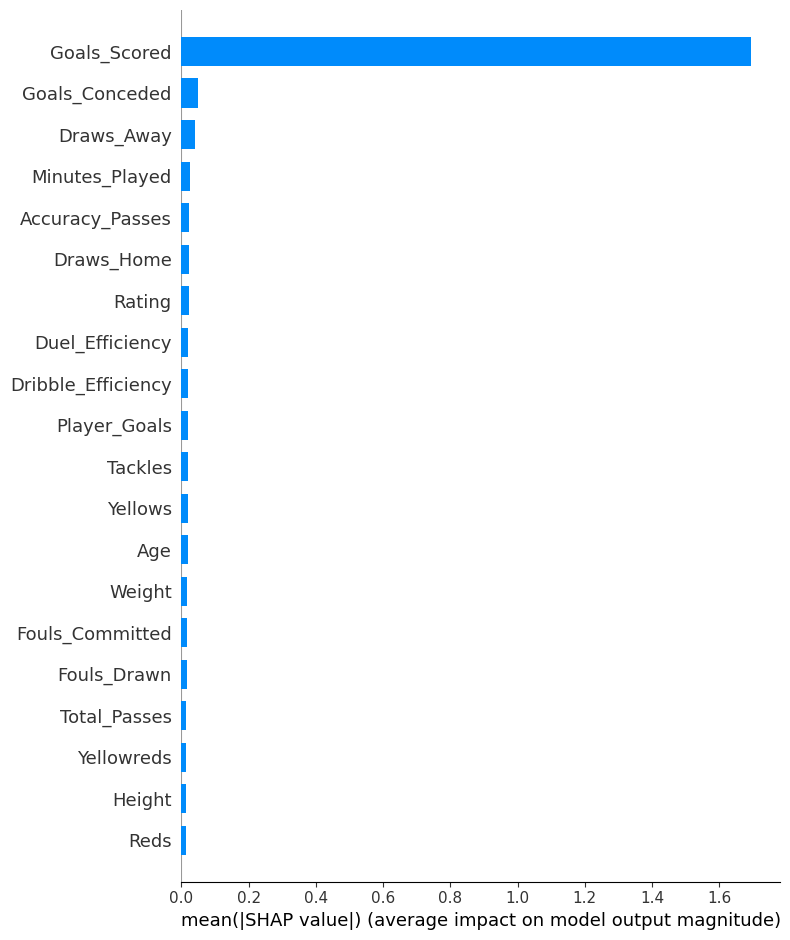

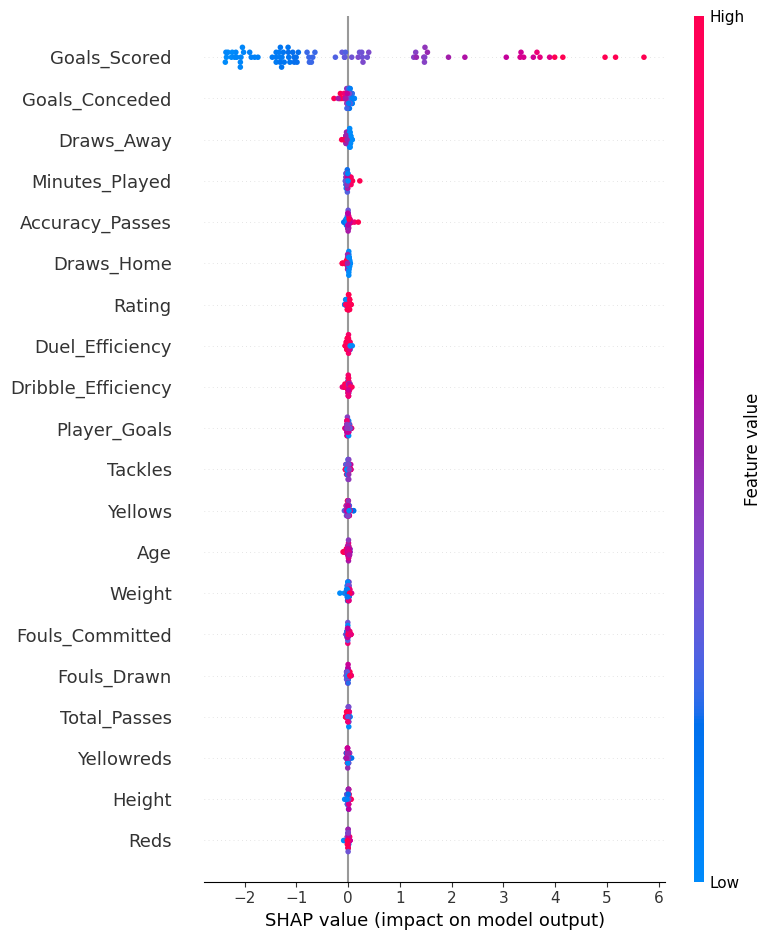

In [36]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Calculate SHAP values
shap_values = shap.KernelExplainer(model.predict, X_test).shap_values(X_test)

# Create a SHAP values object for visualization
sv = shap.Explanation(shap_values, base_values=explainer.expected_value, data=X_test)

# Plot feature importance using a bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

# Alternatively, you can use a bee swarm plot
shap.summary_plot(shap_values, X_test, max_display=20)

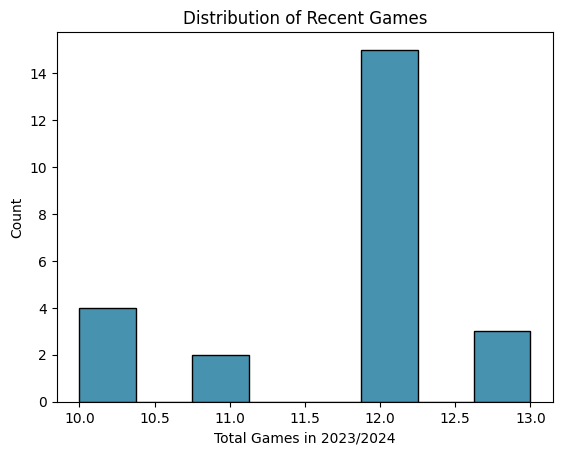

In [42]:
# # Filter for 2023 and 2024 to retrieve recent performance
# recent_performance = hist[hist['Season'].isin([2023, 2024])]

# # Group by Nation and calculate the required statistics
# recent_performance = recent_performance.groupby('Nation').agg({
#     'Wins_Total': 'sum',
#     'Draws_Home': 'sum',
#     'Draws_Away': 'sum',
#     'Loses_Home': 'sum',
#     'Loses_Away': 'sum',
#     'Goals_Scored': 'sum',
#     'Goals_Conceded': 'sum',
#     'Height': 'mean',
#     'Weight': 'mean',
#     'Rating': 'mean',
#     'Minutes_Played': 'mean',
#     'Total_Shots': 'mean',
#     'Player_Goals': 'mean',
#     'Total_Passes': 'mean',
#     'Key_Passes': 'mean',
#     'Accuracy_Passes': 'mean',
#     'Tackles': 'mean',
#     'Dribble_Efficiency': 'mean',
#     'Duel_Efficiency': 'mean',
#     'Fouls_Drawn': 'mean',
#     'Fouls_Committed': 'mean',
#     'Yellows': 'mean',
#     'Reds': 'mean',
#     'Yellowreds': 'mean',
#     'Age': 'mean'
# }).reset_index()

# # Change column names
# recent_performance.columns = [
#     "Nation", "Wins_Total", "Draws_Home", "Draws_Away", "Loses_Home",
#     "Loses_Away", "Goals_Scored", "Goals_Conceded", "Height",
#     "Weight", "Rating", "Minutes_Played", "Total_Shots",
#     "Player_Goals", "Total_Passes", "Key_Passes", "Accuracy_Passes",
#     "Tackles", "Dribble_Efficiency", "Duel_Efficiency",
#     "Fouls_Drawn", "Fouls_Committed", "Yellows", "Reds",
#     "Yellowreds", "Age"
# ]

# # Replace NaNs with 0
# recent_performance.fillna(0, inplace=True)

# # Calculate the total number of games
# recent_performance['total_games'] = recent_performance[
#     ['Wins_Total', 'Draws_Home', 'Draws_Away', 'Loses_Home', 'Loses_Away']
# ].sum(axis=1)

# # Plot the distribution of total games
# plt.figure(figsize=(10, 6))
# plt.hist(recent_performance['total_games'], bins=8, color='#4793AF', edgecolor='black')
# plt.xlabel('Total Games in 2023/2024')
# plt.ylabel('Count')
# plt.title('Distribution of Recent Games')
# plt.grid(True)
# plt.show()




# Assuming hist is a DataFrame already defined
# Filter for 2023 and 2024
recent_performance = hist[hist['Season'].isin([2023, 2024])]

recent_performance = recent_performance.groupby('Nation').agg({
    'Wins_Total': 'sum',
    'Draws_Home': 'sum',
    'Draws_Away': 'sum',
    'Loses_Home': 'sum',
    'Loses_Away': 'sum',
    'Goals_Scored': 'sum',
    'Goals_Conceded': 'sum',
    'Height': 'mean',
    'Weight': 'mean',
    'Rating': 'mean',
    'Minutes_Played': 'mean',
    'Total_Shots': 'mean',
    'Player_Goals': 'mean',
    'Total_Passes': 'mean',
    'Key_Passes': 'mean',
    'Accuracy_Passes': 'mean',
    'Tackles': 'mean',
    'Dribble_Efficiency': 'mean',
    'Duel_Efficiency': 'mean',
    'Fouls_Drawn': 'mean',
    'Fouls_Committed': 'mean',
    'Yellows': 'mean',
    'Reds': 'mean',
    'Yellowreds': 'mean',
    'Age': 'mean'
}).reset_index()

# Group by 'Nation' and calculate summaries
# recent_performance = recent_performance.groupby('Nation').agg({
#     'Wins_Total': 'sum',
#     'Draws_Home': 'sum',
#     'Draws_Away': 'sum',
#     'Loses_Home': 'sum',
#     'Loses_Away': 'sum',
#     'Goals_Scored': 'sum',
#     'Goals_Conceded': 'sum',
#     'Height': 'mean',
#     'Weight': 'mean',
#     'Rating': 'mean',
#     'Minutes_Played': 'mean',
#     'Total_Shots': 'mean',
#     'Player_Goals': 'mean',
#     'Total_Passes': 'mean',
#     'Key_Passes': 'mean',
#     'Accuracy_Passes': 'mean',
#     'Tackles': 'mean',
#     'Dribble_Efficiency': 'mean',
#     'Duel_Efficiency': 'mean',
#     'Fouls_Drawn': 'mean',
#     'Fouls_Comitted': 'mean',
#     'Yellows': 'mean',
#     'Reds': 'mean',
#     'Yellowreds': 'mean',
#     'Age': 'mean'
# }).reset_index()

# Rename columns
recent_performance.columns = ["Nation", "Wins_Total", "Draws_Home", "Draws_Away", "Loses_Home",
                              "Loses_Away", "Goals_Scored", "Goals_Conceded", "Height",
                              "Weight", "Rating", "Minutes_Played", "Total_Shots",
                              "Player_Goals", "Total_Passes", "Key_Passes", "Accuracy_Passes",
                              "Tackles", "Dribble_Efficiency", "Duel_Efficiency",
                              "Fouls_Drawn", "Fouls_Comitted", "Yellows", "Reds",
                              "Yellowreds", "Age"]

# Replace NA values with 0
recent_performance = recent_performance.fillna(0)

# Calculate total games for each row without adding a new column
total_games = recent_performance[['Wins_Total', 'Draws_Home', 'Draws_Away', 'Loses_Home', 'Loses_Away']].sum(axis=1)

# Plotting the histogram
plt.hist(total_games, bins=8, color='#4793AF', edgecolor='black')
plt.xlabel('Total Games in 2023/2024')
plt.ylabel('Count')
plt.title('Distribution of Recent Games')
plt.grid(False)
plt.show()


## Simulation

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Load data
group = pd.read_csv('EURO2024_Group_State.csv')
ko = pd.read_csv('EURO2024_KO.csv')

# Initialize a dataframe to track match outcomes
tournament_results = pd.DataFrame(columns=['Round', 'Home', 'Away', 'Winner'])

# Initialize a dataframe to track points for each nation
nation_points = pd.DataFrame({
    'Nation': nations['Nation'],
    'Points': 0,
    'Group': nations['Group']
})

In [44]:
# Function to update performance metrics after each match
def update_performance(match_result, recent_performance):
    home_team = match_result['Home']
    away_team = match_result['Away']

    home_index = recent_performance[recent_performance['Nation'] == home_team].index[0]
    away_index = recent_performance[recent_performance['Nation'] == away_team].index[0]

    # Update wins
    if not pd.isna(match_result['Winner']):
        if match_result['Winner'] == home_team:
            recent_performance.loc[home_index, 'Wins_Total'] += 1
        else:
            recent_performance.loc[away_index, 'Wins_Total'] += 1

    # Update losses
    if pd.isna(match_result['Winner']):
        recent_performance.loc[home_index, 'Loses_Home'] += 1
        recent_performance.loc[away_index, 'Loses_Away'] += 1
    elif match_result['Winner'] == home_team:
        recent_performance.loc[away_index, 'Loses_Away'] += 1
    elif match_result['Winner'] == away_team:
        recent_performance.loc[home_index, 'Loses_Home'] += 1

    # Update draws
    if pd.isna(match_result['Winner']):
        recent_performance.loc[home_index, 'Draws_Home'] += 1
        recent_performance.loc[away_index, 'Draws_Away'] += 1

    return recent_performance

# Function to update points after each match
def update_points(match_result, nation_points):
    winner = match_result['Winner']
    if not pd.isna(winner):
        # Winner gets 3 points
        nation_points.loc[nation_points['Nation'] == winner, 'Points'] += 3
    else:
        # For a tie, both teams get 1 point
        home_team = match_result['Home']
        away_team = match_result['Away']
        nation_points.loc[nation_points['Nation'] == home_team, 'Points'] += 1
        nation_points.loc[nation_points['Nation'] == away_team, 'Points'] += 1
    return nation_points

# Function to simulate a match
def simulate_match(match, recent_performance, model):
    home_team = match['Home']
    away_team = match['Away']

    # Extract recent performance metrics for home and away teams
    home_performance = recent_performance[recent_performance['Nation'] == home_team].drop(columns=['Nation', 'Wins_Total'])
    away_performance = recent_performance[recent_performance['Nation'] == away_team].drop(columns=['Nation', 'Wins_Total'])

    # Extract features for the match
    match_features = pd.concat([home_performance, away_performance], axis=0)
    # print(match_features.values)
    # print(recent_performance, match_features.values[0])
    # Use random forest model to predict the outcome
    # print("===", match_features.columns, "###")
    predicted_winner = home_team if model.predict(match_features.values)[0] > model.predict(match_features.values)[1] else away_team
    # print("Match is: ", match)
    # Update tournament results dataframe
    # match_result = pd.DataFrame({
    #     'Round': [match['Round']],
    #     'Home': [home_team],
    #     'Away': [away_team],
    #     'Winner': [predicted_winner]
    # })
    match_result = pd.DataFrame({
        'Group': match['Group'],
        'Home': match['Home'],
        'Away': match['Away'],
        'Winner': predicted_winner
    }, index=[0])
    global tournament_results
    tournament_results = pd.concat([tournament_results, match_result], ignore_index=True)

    # Update performance metrics
    return update_performance(match_result.iloc[0], recent_performance)

In [45]:
# Simulate group stage matches
for i in range(len(group)):
    recent_performance = simulate_match(group.iloc[i], recent_performance, model)

# Update points after each match
for i in range(len(tournament_results)):
    nation_points = update_points(tournament_results.iloc[i], nation_points)

# Initialize a data frame to rank the group phase
ranked_nations = pd.DataFrame()
for group in nation_points['Group'].unique():
    group_nations = nation_points[nation_points['Group'] == group]
    group_nations = group_nations.sort_values(by='Points', ascending=False).reset_index(drop=True)
    group_nations['Rank'] = group_nations.index + 1
    ranked_nations = pd.concat([ranked_nations, group_nations], ignore_index=True)

# Print the final ranked nations
print(ranked_nations)

C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.w

            Nation  Points Group  Rank
0          Hungary       9     A     1
1      Switzerland       6     A     2
2         Scotland       3     A     3
3          Germany       0     A     4
4            Spain       9     B     1
5          Croatia       6     B     2
6            Italy       3     B     3
7          Albania       0     B     4
8         Slovenia       9     C     1
9          England       6     C     2
10         Denmark       3     C     3
11          Serbia       0     C     4
12          France       9     D     1
13         Austria       6     D     2
14     Netherlands       3     D     3
15          Poland       0     D     4
16         Belgium       9     E     1
17         Romania       6     E     2
18         Ukraine       3     E     3
19        Slovakia       0     E     4
20        Portugal       9     F     1
21         Georgia       6     F     2
22  Czech Republic       3     F     3
23          Turkey       0     F     4


In [40]:
# !pip install pandas plotly

## Knockout rounds

In [47]:
# Create seed column that combines rank and group for KO plan
ranked_nations['seed'] = ranked_nations['Rank'].astype(str) + ranked_nations['Group']

ko_1 = ko.iloc[:8, :]
ko_2 = ko.iloc[8:, :4]  # Split Round of 16 with other rounds

ko_1 = pd.merge(ko_1, ranked_nations, left_on='Home', right_on='seed', how='left')
ko_1['Home'] = ko_1['Nation']  # Merge Round of 16 home teams based on seed

ko_1 = pd.merge(ko_1, ranked_nations, left_on='Away', right_on='seed', how='left')
ko_1['Away'] = ko_1['Nation_y']  # Merge Round of 16 away teams based on seed

ko_1 = ko_1.iloc[:, :4]
ko = pd.concat([ko_1, ko_2], ignore_index=True)
ko['Game'] = ko['Game'].astype(str)

# Split dataframe into each round
round16 = ko.iloc[:8, :]
quarterfinal = ko.iloc[8:12, :]
semifinal = ko.iloc[12:14, :]
final = ko.iloc[14:15, :]

In [49]:
round16

,Game,Home,Away,Date
0,38,Switzerland,Croatia,06/29/2024
1,37,Hungary,England,06/29/2024
2,40,Slovenia,Netherlands,06/30/2024
3,39,Spain,Scotland,06/30/2024
4,42,Austria,Romania,07/01/2024
5,41,Portugal,Italy,07/01/2024
6,43,Belgium,Denmark,07/02/2024
7,44,France,Georgia,07/02/2024


## Simulating KO rounds


In [62]:
eu_groups = pd.read_csv('europe_groups.csv')

In [76]:
# Adapt function to simulate a match for KO round
def simulate_ko_match(match, recent_performance, model):
    home_team = match['Home']
    away_team = match['Away']

    # Extract recent performance metrics for home and away teams
    home_performance = recent_performance[recent_performance['Nation'] == home_team].drop(columns=['Nation', 'Wins_Total'])
    away_performance = recent_performance[recent_performance['Nation'] == away_team].drop(columns=['Nation', 'Wins_Total'])

    # Extract features for the match
    match_features = pd.concat([home_performance, away_performance], axis=0)

    # Use random forest model to predict the outcome
    # print(match_features.values)
    predicted_winner = home_team if model.predict(match_features.values)[0] > model.predict(match_features.values)[1] else away_team

    # Update tournament results dataframe
    match_result = pd.DataFrame({
        'Group': [match['Group']],
        'Home': [match['Home']],
        'Away': [match['Away']],
        'Winner': [predicted_winner]
    })
    #global ko_result
    #ko_result = pd.concat([ko_result, match_result], ignore_index=True)
    return match_result
    #return ko_result

# def fill_ko_round(ko_result, next_round):
#     print("Got Ko_result: \n", ko_result)
#     print("Got next_round: \n", next_round)
#     # Merge ko_result twice with next_round to get winners' names for home and away teams
#     next_round = next_round.merge(ko_result, left_on='Home', right_on='Winner', suffixes=('_home', ''))
#     next_round = next_round.merge(ko_result, left_on='Away', right_on='Winner', suffixes=('_away', ''))
#     print("intermediate next round_1 ", next_round)
#     # Select required columns and rename them
#     next_round = next_round[['Game', 'Home_away', 'Away_away', 'Date']]
#     next_round.columns = ['Game', 'Home', 'Away', 'Date']
#     print("Created the next round \n", next_round)
#     return next_round


def fill_ko_round(ko_result, next_round):
    # next_round = next_round.merge(ko_result, left_on='Home', right_on='Game', how='left') \
    #                          .rename(columns={'Home': 'Winner'}).drop(columns=['Game_y']) \
    #                          .merge(ko_result, left_on='Away', right_on='Game', how='left') \
    #                          .rename(columns={'Home': 'Winner_y', 'Away': 'Away.x'}).drop(columns=['Game'])

    print("Got Ko_result: \n", ko_result)
    print("Got next_round: \n", next_round)
    # First join
    next_round = next_round.merge(ko_result, left_on='Home', right_on='Game', how='left') \
                          .rename(columns={'Home': 'Winner'}) \
                          .drop(columns=['Game_y'])
    print("SO far we have next_round: \n", next_round)
    print("SO far we have ko_result: \n", ko_result)

    # Second join
    next_round = next_round.merge(ko_result, left_on='Away', right_on='Game', how='left') \
                          .rename(columns={'Home': 'Winner_y', 'Away': 'Away.x'}) \
                          .drop(columns=['Game'])
    next_round['Away.x'] = next_round['Winner_y']
    next_round = next_round[['Game_x', 'Winner', 'Away.x', 'Date_x']].rename(columns={'Game_x': 'Game', 'Away.x': 'Away', 'Date_x': 'Date'})

    return next_round

In [77]:
round16.head(2)

,Game,Home,Away,Date
0,38,Switzerland,Croatia,06/29/2024
1,37,Hungary,England,06/29/2024


In [78]:
eu_groups.head(2)

,Group,Home,Away,tot_group_points_Home,tot_group_points_Away
0,A,Germany,Scotland,0,0
1,A,Hungary,Switzerland,0,0


In [79]:
eu_groups = eu_groups.rename(columns={"HomeTeam": "Home", "AwayTeam": "Away"})

In [84]:
print("Round 16: \n", round16)
print('')
# Loop through each KO round fill KO result data frame
#for i in range(len(round16)):
#    print(simulate_ko_match(round16.iloc[i], recent_performance, model))
#    print('')

result_list = []
for group in sorted(set(eu_groups['Group'])):
    #print("\n-------Starting group {}-------  \n".format(group))
    group_matches = eu_groups[eu_groups['Group'] == group]
    for idx, row in group_matches.iterrows():
        result_list.append(simulate_ko_match(row, recent_performance, model))
        #print(type(simulate_ko_match(row, recent_performance, model)))

Round 16: 
   Game         Home         Away        Date
0   38  Switzerland      Croatia  06/29/2024
1   37      Hungary      England  06/29/2024
2   40     Slovenia  Netherlands  06/30/2024
3   39        Spain     Scotland  06/30/2024
4   42      Austria      Romania  07/01/2024
5   41     Portugal        Italy  07/01/2024
6   43      Belgium      Denmark  07/02/2024
7   44       France      Georgia  07/02/2024



C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tomte\anaconda3\envs\datavers\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.w

In [85]:
result = pd.concat(result_list)

In [89]:
def print_result_pool(dataframe, group):
    return dataframe[dataframe['Group'] == group]

In [90]:
print_result_pool(result, 'A')

,Group,Home,Away,Winner
0,A,Germany,Scotland,Germany
0,A,Hungary,Switzerland,Hungary
0,A,Germany,Hungary,Hungary
0,A,Scotland,Switzerland,Switzerland
0,A,Switzerland,Germany,Switzerland
0,A,Scotland,Hungary,Hungary


In [91]:
print_result_pool(result, 'B')

,Group,Home,Away,Winner
0,B,Spain,Croatia,Spain
0,B,Italy,Albania,Italy
0,B,Croatia,Albania,Croatia
0,B,Spain,Italy,Spain
0,B,Albania,Spain,Spain
0,B,Croatia,Italy,Italy


In [92]:
print_result_pool(result, 'C')

,Group,Home,Away,Winner
0,C,Slovenia,Denmark,Slovenia
0,C,Serbia,England,England
0,C,Slovenia,Serbia,Slovenia
0,C,Denmark,England,England
0,C,England,Slovenia,Slovenia
0,C,Denmark,Serbia,Denmark


In [93]:
print_result_pool(result, 'D')

,Group,Home,Away,Winner
0,D,Poland,Netherlands,Netherlands
0,D,Austria,France,France
0,D,Poland,Austria,Austria
0,D,Netherlands,France,France
0,D,Netherlands,Austria,Austria
0,D,France,Poland,France


In [94]:
print_result_pool(result, 'E')

,Group,Home,Away,Winner
0,E,Romania,Ukraine,Romania
0,E,Belgium,Slovakia,Belgium
0,E,Slovakia,Ukraine,Ukraine
0,E,Belgium,Romania,Belgium
0,E,Slovakia,Romania,Romania
0,E,Ukraine,Belgium,Belgium


In [95]:
print_result_pool(result, 'F')

,Group,Home,Away,Winner
0,F,Turkey,Georgia,Georgia
0,F,Portugal,Czech Republic,Portugal
0,F,Georgia,Czech Republic,Georgia
0,F,Turkey,Portugal,Portugal
0,F,Georgia,Portugal,Portugal
0,F,Czech Republic,Turkey,Czech Republic


In [ ]:
print("Starting quarterfinal")
quarterfinal = fill_ko_round(ko_result, quarterfinal)

for i in range(len(quarterfinal)):
    print("ITERATING QUARTERFINAL i=", i)
    simulate_ko_match(quarterfinal.iloc[i], recent_performance, model)

In [ ]:
print("Starting semifinal")
semifinal = fill_ko_round(ko_result, semifinal)

for i in range(len(semifinal)):
    simulate_ko_match(semifinal.iloc[i], recent_performance, model)

In [ ]:
print("Starting final")
final = fill_ko_round(ko_result, final)

for i in range(len(final)):
    simulate_ko_match(final.iloc[i], recent_performance, model)